In [79]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
import csv, glob, os, sys

plt.rcParams['xtick.labelsize'] = 15; plt.rcParams['ytick.labelsize'] = 15 #make size of axis tick labels larger

rawdf = pd.read_table('hops_TGA_formatted.csv', error_bad_lines=False, delimiter = ',') #read in file
print(rawdf)

          time     temp    citra  centennial  cascade  willamette   simcoe  \
0          0.2   34.176  97.1211     97.8802  97.6862     98.9385  98.9128   
1          0.7   34.180  97.1207     97.8799  97.6857     98.9382  98.9125   
2          1.2   34.185  97.1202     97.8795  97.6854     98.9380  98.9123   
3          1.7   34.189  97.1198     97.8791  97.6851     98.9378  98.9121   
4          2.2   34.194  97.1194     97.8788  97.6847     98.9375  98.9118   
5          2.7   34.198  97.1190     97.8785  97.6843     98.9372  98.9115   
6          3.2   34.202  97.1185     97.8781  97.6838     98.9370  98.9113   
7          3.7   34.208  97.1179     97.8778  97.6834     98.9368  98.9110   
8          4.2   34.212  97.1174     97.8775  97.6830     98.9365  98.9108   
9          4.7   34.216  97.1170     97.8770  97.6826     98.9363  98.9106   
10         5.2   34.220  97.1166     97.8767  97.6823     98.9360  98.9104   
11         5.7   34.225  97.1162     97.8764  97.6819     98.935

In [81]:
time = np.array(rawdf['time'])
temp = np.array(rawdf['temp'])
df = rawdf.drop(['time', 'temp'], axis=1)
hopnames = list(df)
hopmass = np.array(df.as_matrix()).T

#normalize to 100%
for i in range(len(hopmass)): hopmass[i] = hopmass[i] + (100 - np.max(hopmass[i]))

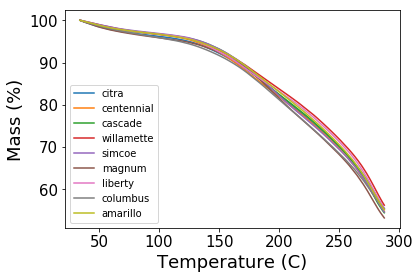

In [82]:
for i in range(len(hopmass)): plt.plot(temp, hopmass[i], label=hopnames[i])
plt.xlabel('Temperature (C)', fontsize=18); plt.ylabel('Mass (%)', fontsize=18)
plt.legend(); plt.show()

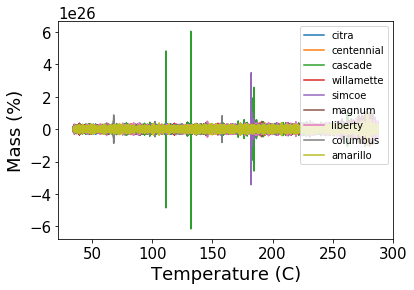

In [91]:
hopdiff = np.diff(hopmass, n=100)

for i in range(len(hopdiff)): plt.plot(temp[100:], hopdiff[i], label=hopnames[i])
plt.xlabel('Temperature (C)', fontsize=18); plt.ylabel('Mass (%)', fontsize=18)
plt.legend(); plt.show()

In [85]:
np.shape(hopmass)

(9, 62321)

In [86]:
np.shape(hopdiff)

(9, 62311)

In [87]:
hopdiff - hopmass

ValueError: operands could not be broadcast together with shapes (9,62311) (9,62321) 